In [24]:
import numpy as np
import pandas as pd
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import RepeatedStratifiedKFold as RSF
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import LinearSVC
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('../datasets/data.csv')
df.head()

,productType,price,sqft,rooms,bathrooms,location,pricePerSqft
0,Apartment,2150000,1117,1,2,Business Bay,1924.798568
1,House,5500000,5500,5,6,Al Furjan,1000.000000
2,Apartment,800000,457,0,1,Business Bay,1750.547046
3,Residence,23000000,5791,4,5,Dubai Marina,3971.680193
4,Apartment,890000,885,1,2,Jumeirah Village Circle (JVC),1005.649718


In [25]:
# Distribution graphs (histogram/bar graph) of data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]]
    columnNames = list(df)
    nCol = len(columnNames)
    nGraphRow = int((nCol + nGraphPerRow - 1) / nGraphPerRow)
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()


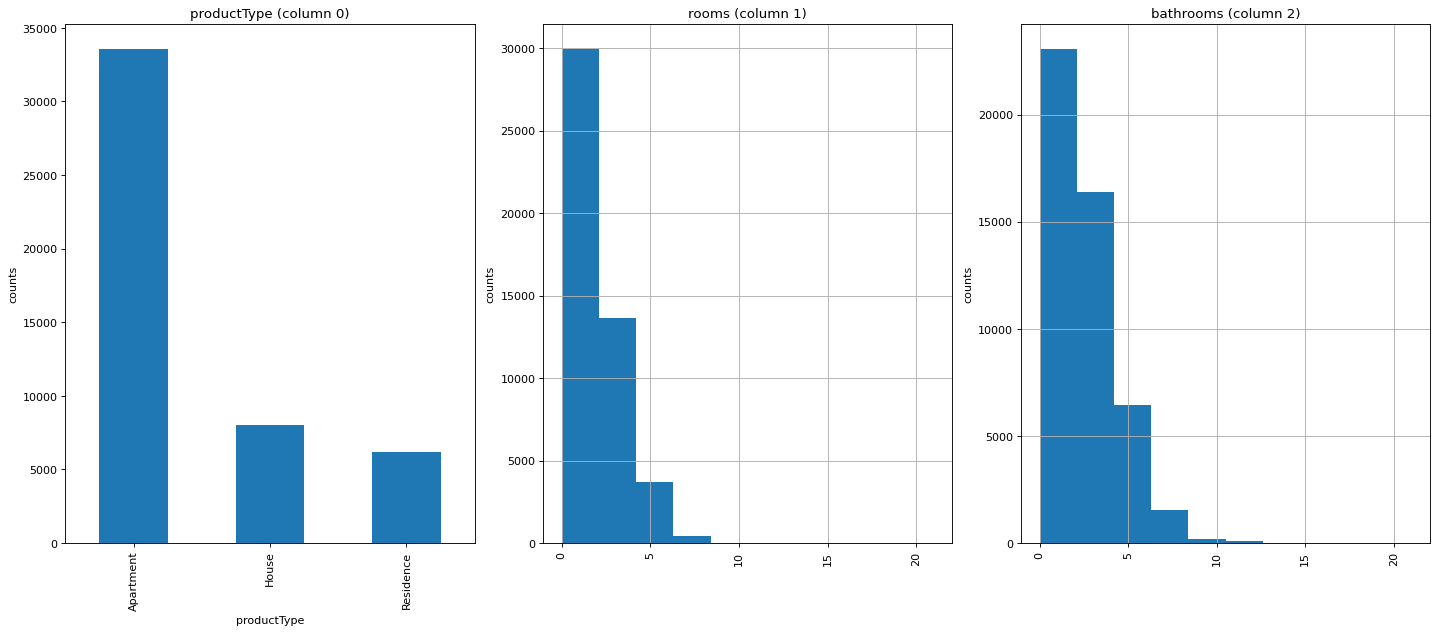

In [27]:
plotPerColumnDistribution(df,10,5)